# Ejercicio
Se realizaron los ensayos de vacío y de cortocircuito sobre un transformador monofásico de 15kVA; 1000/500V, obteniéndose los siguientes resultados:

Ensayo de vacío:
* $P_0 = 135 \, \mathrm{W}$
* $I_0 = 0,48 \, \mathrm{A}$
* $V_0 = 500 \, \mathrm{V}$

Ensayo de corto circuito
* $P_{CC} = 150 \, \mathrm{W}$
* $I_{CC} = 15 \, \mathrm{A}$
* $V_{CC} = 45 \, \mathrm{V}$

1. Obtener los parámetros del circuito equivalente referido al lado de baja tensión modelo del transoformador monofásico real.
2. Calcular el rendimiento de este transformador, para una carga conectada en el lado de baja tensión, considerando:
  * La carga demanda un 80% de la corriente nominal
  * La carga tienen un $\cos \varphi = 0,8$ inductivo.
3. Calcular el rendimiento máximo de esta transformador, para una carga conectada en el lado de baja tensión, considerando:
  * La carga tiene un $\cos \varphi = 0,9$ inductivo.

## Solución

Interpretación y planteo del problema
  * Condición del problema: analizar el circuito equivalente del transformador monofásico real con parámetros referidos al lado de baja tensión, es decir:

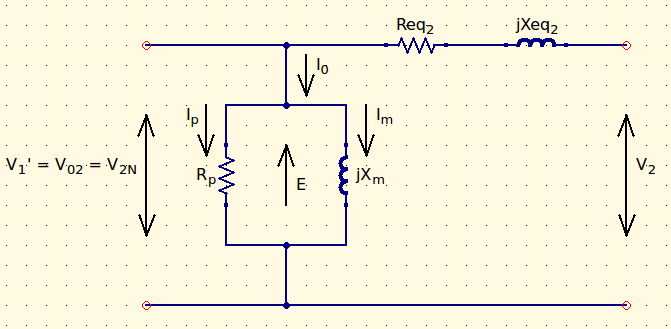  

* El objetivo es hallar el valor de la magnitud de esos parámetros referidos al lado de baja tensión.

In [ ]:
import numpy as np
import cmath

In [ ]:
# Datos:
SN  =  15e3  # VA
V1N =  1000  # V 
V2N =   500  # V
# Ensayo de vacío
Po =  135    # W
Io =    0.48 # A
Vo =  500    # V
# Ensayo de corto circuito
Pcc = 150    # W
Icc =  15    # A
Vcc =  45    # V

### 1) Obtener los parámetros del circuito equivalente referido al lado de baja tensión modelo del transoformador monofásico real.
    
Cálculo de $\varphi_0$
$$ P_0 = I_0 V_0 \cos \varphi_0 $$

In [ ]:
# Cálculo de phi_0
phi_0 = np.arccos(Po/(Io*Vo))
# Cálculo de Ip
Ip = Io*np.cos(phi_0)
# Cálculo de Im
Im = Io*np.sin(phi_0)
# Reactancia del flujo magnético concatenado en el núcleo
Xm2 = V2N/Im
# Pérdidas en el núcleo de hierro
Rp2 = V2N/Ip 

$$\begin{array}{l}
S_N = V_{1N} I_{1N} \\
S_N = V_{2N} I_{2N}
\end{array}$$

In [ ]:
# Corriente nominal 1
I1N = SN/V1N
# Corriente nominal 2
I2N = SN/V2N
# Cálculo de la relación de transformación
a = V1N/V2N

Obtención de parámetros $R_{eq2}$ y $X_{eq2}$

Análisis del ensayo de corto circuito

$$ Z_{eq2} = \frac{V_{cc} / I_{1N}}{a^2} $$

Cálculo de $\varphi_{cc}$
$$ P_{cc} = V_{cc} I_{cc} \cos \varphi_{cc} $$

$$ \varphi_{cc} = \cos^{-1} \frac{P_{cc}}{V_{cc} I_{cc}} $$

Pérdidas por efecto Joule del arrollamiento secundario

$$R_{eq2} = Z_{eq2} \cos \varphi_{cc}$$

Reactancia de dispersión del arrollamiento secundario

$$ X_{eq2} = Z_{eq2} \sin \varphi_{cc} $$

$$ Z_{eq2} = \sqrt{R_{eq2}^2 + X_{eq2}^2} $$

In [ ]:
# Cálculo de phi de corto circuito
phi_cc = np.arccos(Pcc/(Vcc*Icc))
# Cálculo del módulo de la impedancia equivalente en el secundario
Zeq2 = (Vcc/I1N)/a**2
# Resistencia equivalente en el secundario
Req2 = Zeq2*np.cos(phi_cc)
# Reactancia equivalente en el secundario
Xeq2 = Zeq2*np.sin(phi_cc)
# Impedancia equivalente en el secundario
Zeq2 = complex(Req2,Xeq2)

### 2) Rendimiento del transformador para una carga conectada en el lado de baja tensión, considerando:
* La carga demanda un 80% de la corriente nominal
* La carga tiene un $\cos \varphi = 0,8$, inductivo

$$ \eta = \frac{V_2 I_2 \cos \varphi}{V_2 I_2 \cos \varphi + P_0 + P_{cu}} $$

In [ ]:
# Factor de potencia (ítem 2)
fp = 0.8
phi = np.arccos(fp)
# Cálculo de I2
I2 = fp*I2N # condición del problema
# Cálculo de V2
V2 = V2N - I2*(Req2*fp*Xeq2*np.sin(phi))
Pcu = I2**2*Req2
# Rendimiento del transformador para una carga conectada en el
# lado de baja tensión
n = (V2*I2*fp)/(V2*I2*np.cos(phi)+Po+Pcu)

In [ ]:
print('n = %.4f'%n)

n = 0.9764


### 3) Rendimiento máximo de este transformador, para una carga conectada en el lado de baja tensión, considerando:
* La carga tiene un $\cos = 0,9$, inductivo

In [ ]:
# Datos:
fp_max = 0.9

Cálculo de $\varphi_\mathrm{max}$

$$ \varphi_\mathrm{max} = \arccos(\mathrm{fp_{max}}) $$

Cálculo de $I_\mathrm{2max}$

$$ I_\mathrm{2max} = \sqrt{\frac{P_0}{R_{eq2}}} $$

Cálculo de $V_\mathrm{2max}$

$$ V_\mathrm{2max} = V_{2N} - I_\mathrm{2max} (R_{eq2} \mathrm{fp_{max}} + X_{eq2} \sin \varphi_\mathrm{max}) $$

Cálculo de $\eta_\mathrm{max}$

$$ \eta_\mathrm{max} = \frac{V_\mathrm{2max} I_\mathrm{2max} \mathrm{fp_{max}}}{V_\mathrm{2max} I_\mathrm{2max} \mathrm{fp_{max}} + 2 P_0} $$

In [ ]:
phi_max = np.arccos(fp_max)
I2max = np.sqrt(Po/Req2)
V2max = V2N - I2max*(Req2*fp_max+Xeq2*np.sin(phi_max))
# Cálculo de n_max
n_max = (V2max*I2max*fp_max)/(V2max*I2max*fp_max + 2*Po)

In [ ]:
print('n_max = %.4f'%n_max)

n_max = 0.9788
